In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [3]:
df=pd.read_excel("E:\\Data_Train.xlsx")
df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_excel("E:\\Test_set2.xlsx")
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Except price all are string data type

In [6]:
df.shape

(10683, 11)

It has 11 columns and 10683 rows

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

No information stored in two different ways no info and no Info

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

checking forempty space

In [10]:
col=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']
for i in col:
    print(df[i].loc[df[i]==""])

Series([], Name: Airline, dtype: object)
Series([], Name: Date_of_Journey, dtype: object)
Series([], Name: Source, dtype: object)
Series([], Name: Destination, dtype: object)
Series([], Name: Route, dtype: object)
Series([], Name: Dep_Time, dtype: object)
Series([], Name: Arrival_Time, dtype: object)
Series([], Name: Duration, dtype: object)
Series([], Name: Total_Stops, dtype: object)
Series([], Name: Additional_Info, dtype: object)


In [11]:
col1=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']
for i in col:
    print(test[i].loc[test[i]==""])

Series([], Name: Airline, dtype: object)
Series([], Name: Date_of_Journey, dtype: object)
Series([], Name: Source, dtype: object)
Series([], Name: Destination, dtype: object)
Series([], Name: Route, dtype: object)
Series([], Name: Dep_Time, dtype: object)
Series([], Name: Arrival_Time, dtype: object)
Series([], Name: Duration, dtype: object)
Series([], Name: Total_Stops, dtype: object)
Series([], Name: Additional_Info, dtype: object)


Handing null values

In [8]:
df_new=df

In [9]:
print(df['Route'].mode())
print(df['Total_Stops'].mode())

0    DEL → BOM → COK
dtype: object
0    1 stop
dtype: object


In [10]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
test[test['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [12]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [13]:
df_new['Route'].fillna("DEL ? BOM ? COK",inplace=True)
df_new['Total_Stops'].fillna("1 stop",inplace=True)

In [14]:
df_new[df_new['Route'].isnull()]
df_new[df_new['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


null value is replaced with mode value

___Handling Date column

In [15]:
test_new=test

In [16]:
df_new["Month"] = pd.to_datetime(df["Date_of_Journey"],format = "%d/%m/%Y").dt.month
df_new["Day"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [17]:
test_new["Month"] = pd.to_datetime(test["Date_of_Journey"],format = "%d/%m/%Y").dt.month
test_new["Day"] = pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.day

In this dataset we are going to analyse dataset with same year 2019 so I have splitted Date of journey into two seperate coloumns

In [18]:
df_new.drop(["Date_of_Journey"],axis=1,inplace=True)

In [19]:
test_new.drop(["Date_of_Journey"],axis=1,inplace=True)

In [20]:
df_new.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


___Handling Time Feature

In [21]:
df_new['Dep_hour'] = pd.to_datetime(df["Dep_Time"]).dt.hour
df_new["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df_new.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
test_new['Dep_hour'] = pd.to_datetime(test["Dep_Time"]).dt.hour
test_new["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test_new.drop(['Dep_Time'],axis=1,inplace=True)

In [23]:
df_new.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [24]:
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55


In [25]:
duration = list(df["Duration"])
hours = []
mins = []

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]
for i in range(len(duration)):
    hours.append(int(duration[i].split(sep = "h")[0]))
    mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [26]:
len(hours)
len(mins)

10683

In [27]:
df_new.shape

(10683, 13)

In [28]:
df_new['duration_hour']=hours
df_new['duration_min']=mins

In [29]:
duration = list(test["Duration"])
hours = []
mins = []

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]
for i in range(len(duration)):
    hours.append(int(duration[i].split(sep = "h")[0]))
    mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [30]:
test_new['duration_hour']=hours
test_new['duration_min']=mins

In [31]:
df_new.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,4,45


In [32]:
df_new['Arrival_hour'] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df_new["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df_new.drop(['Arrival_Time'],axis=1,inplace=True)

In [33]:
test_new['Arrival_hour'] = pd.to_datetime(test["Arrival_Time"]).dt.hour
test_new["Arrival_min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute
test_new.drop(['Arrival_Time'],axis=1,inplace=True)

In [34]:
df_new.drop(['Duration'],axis=1,inplace=True)

In [35]:
test_new.drop(['Duration'],axis=1,inplace=True)

In [36]:
df_new.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min,duration_hour,duration_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,4,45,21,35


In [37]:
test_new.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_min,duration_hour,duration_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,10,55,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,4,0,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,23,45,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,13,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,50,2,45


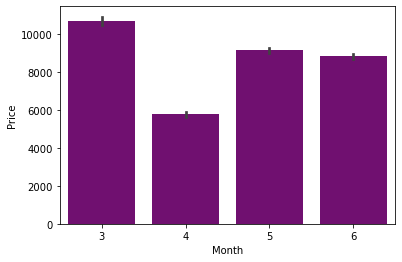

In [38]:
sns.barplot(x="Month",y="Price",data=df_new,color='purple')
plt.show()

mostly the price high in 3rd month

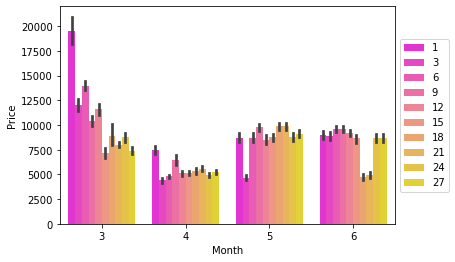

In [39]:
sns.barplot(x="Month",y="Price",data=df_new,palette='spring',hue='Day')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

mostly the price is high in march first two weeks.
first day of every month has high price

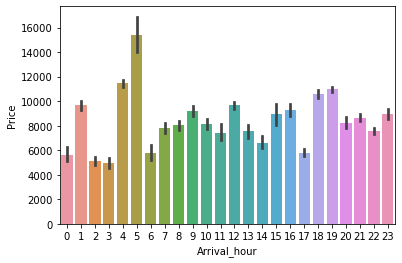

<module 'matplotlib.pyplot' from 'C:\\Users\\my pc\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [40]:
sns.barplot(x="Arrival_hour",y="Price",data=df_new)
##plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
plt

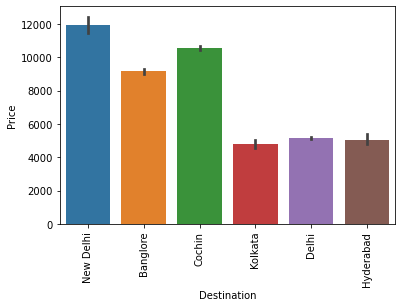

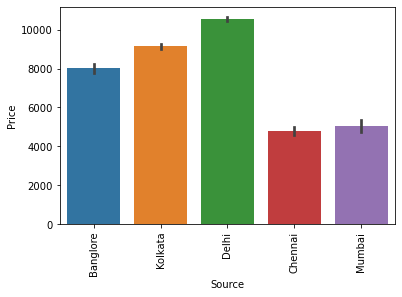

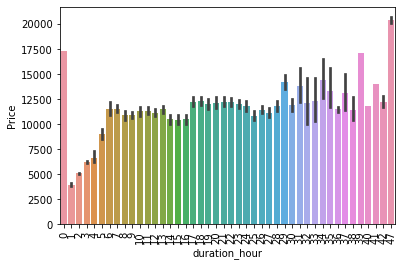

In [41]:
sns.barplot(x="Destination",y="Price",data=df_new)
plt.xticks(rotation=90)
plt.show()


sns.barplot(x="Source",y="Price",data=df_new)
plt.xticks(rotation=90)
plt.show()


sns.barplot(x="duration_hour",y="Price",data=df_new)
plt.xticks(rotation=90)
plt.show()

the flight which has less than 1 hour and which have long duration both having high price

<AxesSubplot:xlabel='duration_hour', ylabel='Destination'>

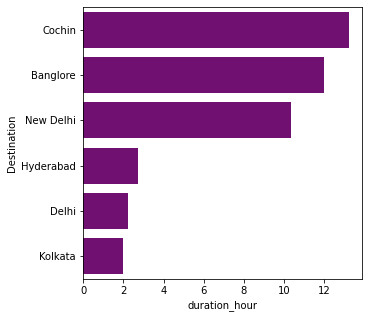

In [42]:
desti=df_new.groupby(['Destination']).mean()
desti_df=pd.DataFrame(data=desti)
order_dest=desti_df.sort_values(by='duration_hour',ascending=False,axis=0)
plt.figure(figsize=(5,5))
##plt.title('Average price across different regions')
sns.barplot(x='duration_hour',y=order_dest.index,data=order_dest,color="purple")

cochin and banglore has highest duration but new delhi has high price

In [43]:
df_new.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month', 'Day', 'Dep_hour', 'Dep_min',
       'duration_hour', 'duration_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [44]:
data_new=df_new
col_encod=['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month', 'Day', 'Dep_hour', 'Dep_min',
       'duration_hour', 'duration_min', 'Arrival_hour', 'Arrival_min']
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_new[col]= label.fit_transform(df_new[col])

In [45]:
data_new.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_min,duration_hour,duration_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,65,0,8,22,4,2,10,1,2
1,1,3,0,84,1,8,669,2,0,5,10,7,5,13,3
2,4,2,1,119,1,8,1537,3,3,9,5,19,0,4,5
3,3,3,0,91,0,8,389,2,4,18,1,5,5,23,6
4,3,0,5,29,0,8,1457,0,0,16,10,4,9,21,7


In [46]:

col_encod=['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month', 'Day', 'Dep_hour', 'Dep_min',
       'duration_hour', 'duration_min', 'Arrival_hour', 'Arrival_min']
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    test_new[col]= label.fit_transform(test_new[col])

In [47]:
test_new.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_min,duration_hour,duration_min,Arrival_hour,Arrival_min
0,4,2,1,76,0,5,3,2,17,6,10,11,4,5
1,3,3,0,65,0,5,2,4,6,4,4,0,10,4
2,4,2,1,76,0,3,2,7,19,3,23,9,19,0
3,6,2,1,76,0,5,2,7,8,0,13,0,21,0
4,0,0,2,16,4,5,3,8,23,11,2,10,2,9


Corelation matrix

<AxesSubplot:>

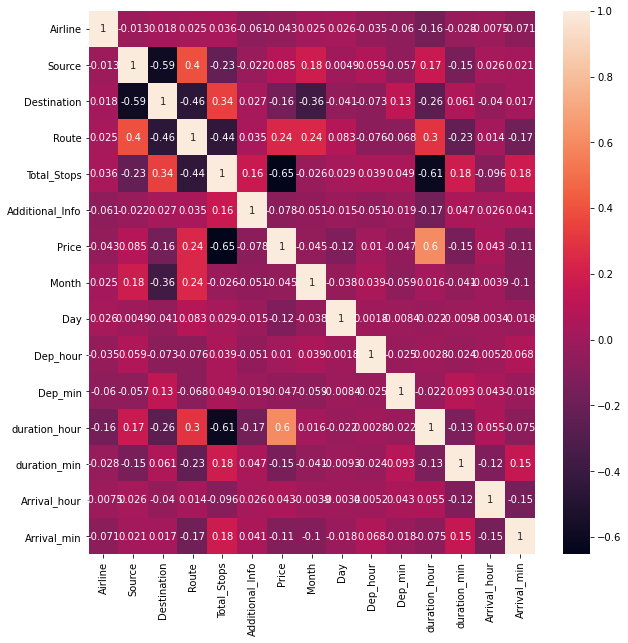

In [48]:
correlation=data_new.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

price is highly corelated with duration hour.
price is negatively corelated with total stops

In [49]:
x1=data_new.drop('Price',axis=1)
y1=data_new['Price']


In [50]:

from sklearn.feature_selection import mutual_info_classif
imp_feature = pd.DataFrame(mutual_info_classif(x1,y1),index=x1.columns)

<AxesSubplot:>

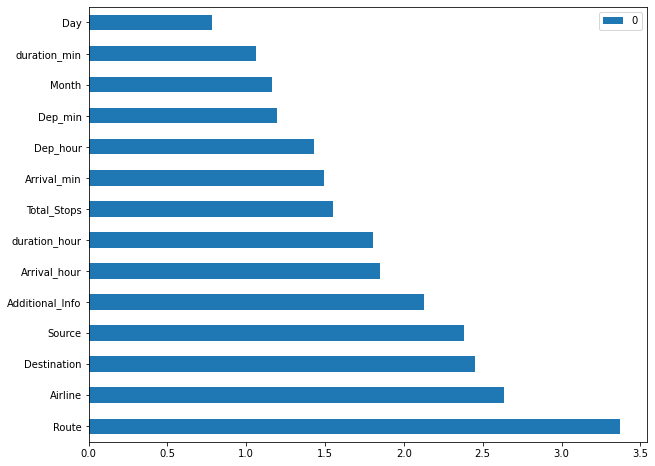

In [51]:
imp_feature.sort_values(by=0,ascending=False).plot(kind='barh',figsize=(10,8))


Route and airline has highesr priority

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

_feature scaling transforming un scaled data into scaled data using min max scalining technique

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
x=scaled
y=y1

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [55]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 165.84238113066266
Mean squared error 64704.189517034814
Root Mean squared error 254.37018205173894
R2 Score 0.8007920914097335
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 375.0519097107028
Mean squared error 200389.10952131363
Root Mean squared error 447.648421779094
R2 Score 0.38305238486145987
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 78.66310994633722
Mean squared error 31036.49412413162
Root Mean squared error 176.17177448198566
R2 Score 0.9044464488220717
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 320.68097180487604
Mean squared error 156840.8634508225
Root Mean squared error 396.03139200172313
R2 Score 0.5171264701290437
------------------------

In [57]:
scorel=[]

In [58]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.82812837, 0.82888033, 0.81136332, 0.80540479, 0.81074216])

In [59]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.39205945, 0.400943  , 0.40237379, 0.3969192 , 0.38896318])

In [60]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.90392412, 0.90270063, 0.88875382, 0.88712423, 0.8901578 ])

In [61]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.5171984 , 0.54812023, 0.52415846, 0.49497123, 0.50654431])

In [62]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.51562707, 0.54810359, 0.52265958, 0.49467351, 0.50621071])

In [63]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.94164675, 0.93724432, 0.93805343, 0.92678133, 0.93452042])

In [64]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.85416858, 0.85549674, 0.85331923, 0.8412143 , 0.85828786])

Difference of predicted model and crossvalidation score

In [66]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,7):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [0.02733627 0.02808824 0.01057123 0.00461269 0.00995007]
SVR() difference is [0.00900706 0.01789062 0.01932141 0.01386681 0.0059108 ]
DecisionTreeRegressor() difference is [-0.00052233 -0.00174582 -0.01569263 -0.01732222 -0.01428865]
LinearRegression() difference is [ 7.19249161e-05  3.09937560e-02  7.03199167e-03 -2.21552434e-02
 -1.05821619e-02]
Lasso() difference is [ 0.00040354  0.03288006  0.00743605 -0.02055002 -0.00901282]
RandomForestRegressor() difference is [ 0.00845764  0.00405521  0.00486432 -0.00640778  0.00133131]
GradientBoostingRegressor() difference is [-0.00033658  0.00099158 -0.00118593 -0.01329086  0.0037827 ]


Random forest has least difference

In [176]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt','log2'],'n_estimators': [10, 100, 200, 500],'bootstrap':[True],'max_depth': [1, 23, 45],'min_samples_split': [5, 10]}
grid = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 5, scoring = "r2")



In [177]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'bootstrap': True, 'max_depth': 23, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 500}


MODELING USING BEST PARAMETERS

In [67]:
x=scaled
y=y1

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=RandomForestRegressor(n_estimators=500,max_features='auto',bootstrap=True,max_depth=23,min_samples_split=5)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)
     

Accuracy 94.0
Mean absolute error 74.85625001490176
Mean squared error 19553.71005953251
Root Mean squared error 139.83458105752135
r2 score 94.0


In [ ]:
the best model is Randomforest regressor
After hyper tuning the accursacy is 94

Saving the model

In [72]:
from joblib import dump
dump(model, 'model_flight.joblib')

['model_flight.joblib']

In [73]:
from joblib import load
loaded = load('model_flight.joblib')